<a href="https://colab.research.google.com/github/JamieBali/sudoku/blob/main/SA_Sudoku_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import random, math, statistics
import pandas

In [2]:
trivial = [[8,9,1,2,7,0,5,6,3],[6,0,3,1,8,5,9,0,0],[4,5,7,6,3,9,0,0,2],[5,0,6,4,1,7,2,3,0],[7,0,2,9,0,3,8,1,6],[3,1,0,0,2,6,0,5,4],[9,3,8,5,4,0,6,7,0],[1,6,4,0,9,0,3,2,5],[0,7,5,3,6,1,4,9,8]]

# this is a very simple 4x4 sudoku from sudoku.com
four = [[0,3,4,0],[4,0,0,2],[1,0,0,3],[0,2,1,0]]

demo = [[6,0,9,1,0,2,0,8,0],[0,0,0,0,0,0,4,0,0],[5,0,2,0,0,0,0,0,0],[0,0,0,0,2,0,3,0,4],[1,0,0,0,0,5,0,0,0],[0,2,0,0,0,0,5,0,6],[0,0,0,8,0,1,0,0,0],[0,0,0,0,0,0,0,0,9],[8,0,5,9,0,7,0,4,0]]

# these three were taken randomly from sudoku.com
easy = [[0,0,0,0,7,9,0,3,0],[5,0,2,0,6,1,4,7,8],[3,7,6,0,8,5,9,0,2],[0,1,7,5,0,0,8,0,0],[2,0,9,8,3,0,0,0,0],[0,0,0,0,2,0,0,4,0],[0,0,0,0,5,0,2,0,1],[0,2,3,0,0,0,0,5,4],[1,0,0,7,0,0,0,0,0]]
medium = [[0,3,1,0,5,0,0,2,0],[0,0,0,0,0,2,9,0,5],[2,0,0,0,1,0,0,0,0],[3,5,0,0,9,0,0,7,0],[7,0,0,5,0,0,0,4,0],[0,1,0,7,0,3,2,0,0],[1,2,6,3,0,0,0,0,0],[0,9,0,8,0,5,0,0,0],[5,0,0,0,2,0,7,0,0]]
hard = [[0,4,0,0,0,5,0,6,0],[0,0,5,4,2,0,0,0,0],[0,0,1,6,0,3,5,0,4],[0,0,0,0,0,0,7,0,0],[0,3,7,0,0,0,0,1,0],[9,0,0,0,0,4,3,5,0],[0,0,4,2,5,0,0,0,0],[0,0,0,0,0,0,0,7,6],[6,0,9,0,7,0,0,0,5]]

# this is a 25x25 sudoku taken from an old c programming forum in from 2006 https://cboard.cprogramming.com/cplusplus-programming/117005-25x25-sudoku.html
twentyfive = [[0,0,12,6,0,0,7,0,18,0,5,24,0,10,1,0,0,4,0,0,0,0,0,0,0], [2,0,19,0,13,0,0,0,10,0,0,0,0,0,0,0,0,18,5,0,0,0,0,0,1], [0,0,0,0,0,0,0,22,0,0,0,0,3,0,2,0,0,14,12,0,16,8,25,0,0],[0,16,0,0,0,2,23,0,0,13,12,22,0,0,0,21,15,19,3,0,0,0,0,14,0],[23,0,24,0,0,0,0,0,25,8,4,0,16,19,21,0,0,7,0,0,0,3,12,0,9],[0,4,0,2,0,0,0,0,0,0,0,10,0,24,12,17,16,0,0,0,5,0,0,0,0],[0,0,9,0,0,6,25,0,0,0,8,0,5,3,0,0,0,0,0,0,20,0,0,18,19],[15,0,10,11,0,0,0,18,12,19,0,0,0,0,0,0,0,23,0,0,7,0,0,4,0], [0,0,0,0,0,0,0,14,0,22,0,0,18,16,20,0,6,11,13,0,0,0,0,0,0], [0,22,0,25,0,0,1,17,5,4,7,0,0,14,0,8,3,21,0,0,11,0,0,0,6], [0,20,13,15,0,0,0,0,0,0,9,0,0,2,0,25,0,1,8,0,0,5,0,21,0], [0,1,0,0,0,0,16,10,0,7,0,0,4,20,0,0,9,0,0,14,0,24,0,17,0], [25,2,5,0,0,0,0,0,13,0,0,0,0,0,22,0,0,0,0,0,19,1,8,0,0], [0,0,7,21,0,0,12,0,2,17,0,0,0,18,6,16,0,0,15,0,0,13,0,10,0], [8,10,18,12,16,9,0,0,0,5,0,0,0,0,19,0,0,17,0,21,0,15,0,0,22], [0,8,0,0,15,0,3,0,6,0,21,0,0,7,0,18,14,5,0,1,0,0,0,0,0], [0,0,0,19,0,1,0,16,11,0,0,0,10,22,25,15,0,0,0,0,0,0,21,0,0], [0,3,1,0,21,0,0,4,0,0,0,0,2,0,13,0,24,25,0,0,14,0,0,6,0], [0,0,0,0,0,0,0,15,0,12,14,0,6,17,24,0,0,0,0,0,0,0,13,0,0], [0,5,23,16,4,0,13,24,7,2,0,9,0,0,15,3,0,22,0,0,0,0,0,0,8], [0,0,25,20,2,0,19,0,0,0,0,1,0,0,0,0,21,3,0,0,12,0,0,0,0], [16,12,0,5,0,11,21,0,23,0,0,15,0,0,0,0,19,9,0,0,0,0,0,25,10], [0,0,0,0,9,20,22,7,4,0,3,0,14,25,18,0,11,0,0,0,0,0,1,0,15], [24,0,6,0,22,8,0,25,14,0,10,11,0,9,0,20,1,16,0,7,0,23,0,0,13], [14,13,21,1,0,0,5,0,0,0,6,0,22,0,23,10,0,0,0,2,0,0,18,7,11]]

# this is the solved version of the "easy" sudoku above.
solved = [[8,4,1,2,7,9,6,3,5],[5,9,2,3,6,1,4,7,8],[3,7,6,4,8,5,9,1,2],[4,1,7,5,9,6,8,2,3],[2,5,9,8,3,4,1,6,7],[6,3,8,1,2,7,5,4,9],[7,6,4,9,5,3,2,8,1],[9,2,3,6,1,8,7,5,4],[1,8,5,7,4,2,3,9,6]]

# Simulated Annealing

In [15]:
class simulatedAnnealing():
  def __init__(self, puzzle, size, cooling_rate):
    self.size = size
    self.puzzle, self.pick_options = self.randomly_fill(np.copy(puzzle))
    self.cooling_rate = cooling_rate
    self.err = 0
    self.temperature = 2.31         
    self.energy = self.get_energy(self.puzzle)
    self.itterations = sum([int(x != 0) for x in np.copy(puzzle).flatten()])

  def randomly_fill(self, puzzle):
    rt = int(math.sqrt(self.size))  
    pick_options = []     # this will be a list of lists, where each sub-list represents a sub-grid
    for x_itt in range(rt):     # itterate through sub-grids
      for y_itt in range(rt):
        block = []
        temp_options = []       
        for x in range(rt):     # then for each tile in that sub-grid
          for y in range(rt): 
            nx = (x_itt * rt) + x
            ny = (y_itt * rt) + y
            if puzzle[nx][ny] == 0:                 # if the tile is 0, append it to the list of pick options
              temp_options.append([nx, ny])
            else:                                   # else, append its value to the used values list
              block.append(puzzle[nx][ny])
        if len(temp_options) == 1:                  # if only one tile is missing, set it as a given
          for x in range(1, self.size + 1):
            if x not in block:
              puzzle[temp_options[0][0]][temp_options[0][1]] = x
          temp_options = []
        else:                                       # else, we randomly fill the rest of the grid
          for pos in temp_options:
            temp = []                               # make a list of values *not* picked
            for i in range(1, self.size + 1):       
              if i not in block:
                temp.append(i)
            picked = random.choice(temp)            # pick a value from those
            puzzle[pos[0]][pos[1]] = picked         # set it
            block.append(picked)                    # make sure it can't get picked again
        pick_options.append(temp_options)   
    return puzzle, pick_options             

  def get_energy(self, puzz):
    energy = 0
    for x in range(self.size):                # x and y are generic itterators
      row_vals = np.zeros(self.size)          # they do not neccessarily refer to the x and y coordinates
      column_vals = np.zeros(self.size)
      for y in range(self.size):  
        row_vals[puzz[x][y] -1] += 1          # the grid is square, so we can swap the coords around to cover everything
        column_vals[puzz[y][x] - 1] += 1
      energy += sum(row_vals != 1) + sum(column_vals != 1)    
    return energy
    
  def swap_and_check(self, a, b):
    temp_puzzle = np.copy(self.puzzle)
    temp_puzzle[a[0]][a[1]] = self.puzzle[b[0]][b[1]]   # swap variables onto a temp puzzle
    temp_puzzle[b[0]][b[1]] = self.puzzle[a[0]][a[1]]

    delta = self.get_energy(temp_puzzle) - self.energy    # get the energy change
    temp = math.exp(-delta/self.temperature)              # exponential so we get a probability that scales with temperature
    if(np.random.uniform(1,0,1) < temp):                  # random pick
      self.energy = self.get_energy(temp_puzzle)
      self.err = 0                                        # update and reset error
      return temp_puzzle, True
    else:
      self.err += 1                                       # or don't update and increment error
      return self.puzzle, False
  
  def step(self):
    data = []
    for x in range(self.itterations):                           # an itteration loop means we can control when the cooling takes place
      box_no = random.randint(0,self.size - 1)                            
      choices = self.pick_options[box_no]                           # pick a random box and choice
      if len(choices) != 0:
        vals = random.sample(choices, 2)                            # pick a pair
        self.puzzle, swapped = self.swap_and_check(vals[0], vals[1])         # run the swap and check function
        if swapped:
          data.append(self.puzzle)
    self.temperature *= self.cooling_rate                        # cool and check for errors
    if self.err > 80:
      self.temperature += 1.2
      self.err = 0
    return data


In [16]:
solver = simulatedAnnealing(easy, 9, 0.99)
fd = []
while solver.energy != 0:
  fd.append(solver.step())
  print(solver.energy)


54
53
46
47
37
49
47
35
34
34
28
44
32
41
39
33
32
42
46
36
39
38
38
44
39
35
36
37
38
48
46
31
36
35
40
36
47
34
26
26
29
36
34
25
39
32
34
33
32
33
30
24
20
21
26
22
26
20
31
30
30
36
24
21
21
25
33
26
30
28
26
22
20
14
16
20
16
14
16
14
14
16
14
14
18
12
12
12
24
35
45
36
41
41
38
39
44
40
36
28
45
60
39
39
34
36
28
38
33
41
30
30
26
28
31
30
28
36
41
32
30
30
26
28
20
24
32
30
26
30
28
23
22
31
29
22
33
36
39
37
30
32
29
25
25
28
27
24
20
20
30
22
24
22
22
28
24
30
24
18
18
18
14
16
16
16
16
19
20
20
18
22
20
20
22
22
24
24
24
24
24
25
23
22
22
22
24
25
16
16
16
16
12
8
8
8
8
8
12
8
8
8
4
4
4
8
8
12
10
20
16
20
36
16
19
27
24
30
31
24
35
30
30
38
34
24
24
30
30
32
27
23
28
34
28
34
28
26
31
29
23
26
26
24
34
28
30
28
26
26
30
28
24
22
25
22
28
20
22
20
18
21
29
28
37
34
32
26
24
28
20
12
12
12
12
10
10
12
12
12
12
10
10
10
8
8
8
8
8
8
8
8
10
10
10
12
12
14
14
10
6
6
8
6
6
4
4
4
4
4
4
24
22
18
20
24
22
34
31
33
38
47
40
46
30
30
27
32
38
34
42
37
30
30
26
32
28
34
33
29
30
32
29
40


Streaming output truncated to the last 5000 lines.
541 / 5541
542 / 5541
543 / 5541
544 / 5541
545 / 5541
546 / 5541
547 / 5541
548 / 5541
549 / 5541
550 / 5541
551 / 5541
552 / 5541
553 / 5541
554 / 5541
555 / 5541
556 / 5541
557 / 5541
558 / 5541
559 / 5541
560 / 5541
561 / 5541
562 / 5541
563 / 5541
564 / 5541
565 / 5541
566 / 5541
567 / 5541
568 / 5541
569 / 5541
570 / 5541
571 / 5541
572 / 5541
573 / 5541
574 / 5541
575 / 5541
576 / 5541
577 / 5541
578 / 5541
579 / 5541
580 / 5541
581 / 5541
582 / 5541
583 / 5541
584 / 5541
585 / 5541
586 / 5541
587 / 5541
588 / 5541
589 / 5541
590 / 5541
591 / 5541
592 / 5541
593 / 5541
594 / 5541
595 / 5541
596 / 5541
597 / 5541
598 / 5541
599 / 5541
600 / 5541
601 / 5541
602 / 5541
603 / 5541
604 / 5541
605 / 5541
606 / 5541
607 / 5541
608 / 5541
609 / 5541
610 / 5541
611 / 5541
612 / 5541
613 / 5541
614 / 5541
615 / 5541
616 / 5541
617 / 5541
618 / 5541
619 / 5541
620 / 5541
621 / 5541
622 / 5541
623 / 5541
624 / 5541
625 / 5541
626 / 5541
627

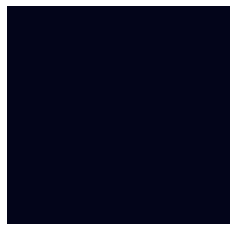

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

def is_violation(x, y, z, board):
  for t in range(9):
    if t != x:
      if board[t][y] == z:
        return True
    if t != y:
      if board[x][t] == z:
        return True
  return False

files = []
itt = 0
for step in td:
  print(str(itt) + " / 5541")
  print_data = np.zeros((9,9))
  for x in range(9):
    for y in range(9):
      if is_violation(x, y, step[x][y], step):
        print_data[x][y] = 0.5
      if easy[x][y] != 0:
        print_data[x][y] = 0
  df = pandas.DataFrame(print_data)
  ax = sns.heatmap(df, vmax = 1, vmin = 0, cbar = False, xticklabels=[], yticklabels=[])
  sns.set(rc={'figure.figsize':(4,4)})
  plt.savefig(str(itt) + ".png")
  files.append(str(itt) + ".png")
  itt += 1

with imageio.get_writer("giftime.gif", mode="I") as writer:
  for filename in files:
    image = imageio.imread(filename)
    writer.append_data(image)

In [19]:
print(solver.puzzle)

[[8 4 1 2 7 9 6 3 5]
 [5 9 2 3 6 1 4 7 8]
 [3 7 6 4 8 5 9 1 2]
 [4 1 7 5 9 6 8 2 3]
 [2 5 9 8 3 4 1 6 7]
 [6 3 8 1 2 7 5 4 9]
 [7 6 4 9 5 3 2 8 1]
 [9 2 3 6 1 8 7 5 4]
 [1 8 5 7 4 2 3 9 6]]


In [40]:
with imageio.get_writer("00.gif", mode="I") as writer:
  for filename in files:
    image = imageio.imread(filename)
    writer.append_data(image)

In [41]:
!pip install pygifsicle

  Created wheel for pygifsicle: filename=pygifsicle-1.0.5-py3-none-any.whl size=4605 sha256=3620037c507af96059b3ed8113de0a9abbb4196ca9c4d379f732d9280e173f72
  Stored in directory: /root/.cache/pip/wheels/80/a3/e9/b215e70a62741278d2e4f41403e486787c32a082bdb33551b4
Successfully built pygifsicle


In [47]:
from google.colab import drive
drive.mount('gdrive')
from pygifsicle import optimize
import os
optimize("/content/gdrive/My Drive/00.gif")

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


FileNotFoundError: ignored